# Overview

The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

In [39]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Imputer
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [9]:
# Loading data
dataset = pd.read_csv('creditcard.csv')

In [10]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Input and Ouput data

In [11]:
x = dataset.iloc[: , 1:30].values
y = dataset.iloc[:, 30].values

In [12]:
print("Input Shape : ", x.shape)
print("Output Shape : ", y.shape)

Input Shape :  (284807, 29)
Output Shape :  (284807,)


In [6]:
print ("Labels : \n", y)

Labels : 
 [0 0 0 ..., 0 0 0]


## Handling Missing Values

In [13]:
imputer = Imputer(missing_values="NaN", strategy="mean", axis=0)
imputer = imputer.fit(x[:, 1:30])
x[:, 1:30] = imputer.fit_transform(x[:, 1:30])

## Splitting testing and training data

In [15]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.20, random_state = 0)

In [16]:
print("xtrain.shape : ", xtrain.shape)
print("xtest.shape  : ", xtest.shape)
print("ytrain.shape : ", ytrain.shape)
print("xtest.shape  : ", xtest.shape)

xtrain.shape :  (227845, 29)
xtest.shape  :  (56962, 29)
ytrain.shape :  (227845,)
xtest.shape  :  (56962, 29)


## Feature Scaling

In [17]:
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain)
xtest = sc_x.transform(xtest)

In [18]:
print("Standardised Training Set : \n", xtrain[0])

Standardised Training Set : 
 [-0.57177938  0.62828369  0.52947541 -0.74947851  0.02513661  0.64419197
 -0.50095927 -2.67920866  1.40000875 -0.75008128 -1.27966858  0.10939986
 -0.86274096 -0.07624814  0.98986897 -1.96475363  0.93770553 -0.0071916
  2.40038757 -0.84545796  4.09457123 -0.74296932  0.05365724 -1.28147351
  0.20289788 -0.89278281  0.57377804 -0.2196612  -0.30511629]


# Decision Tree Classification

In [19]:
dt_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dt_classifier.fit(xtrain, ytrain)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [20]:
# Predicting 
y_pred_decision_tree = dt_classifier.predict(xtest)

In [21]:
print("y_pred_decision_tree : \n", y_pred_decision_tree)

y_pred_decision_tree : 
 [0 0 0 ... 0 0 0]


In [22]:
cm_decision = confusion_matrix(ytest, y_pred_decision_tree)
print("confusion Marix : \n", cm_decision)

confusion Marix : 
 [[56840    21]
 [   18    83]]


In [30]:
y_pred_decision_tree

array([0, 0, 0, ..., 0, 0, 0])

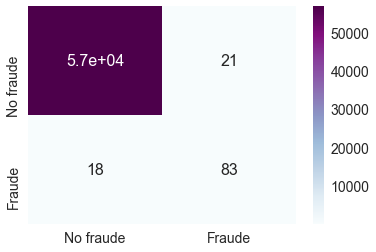

In [42]:
df_cm = pd.DataFrame(cm_decision, ['No fraude','Fraude'],
                  ['No fraude','Fraude'])

sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, cmap="BuPu")# font size

## Results of Decision Tree Classification

In [21]:

Accuracy_Decison = ((cm_decision[0][0] + cm_decision[1][1]) / cm_decision.sum()) *100
print("Accuracy_Decison    : ", Accuracy_Decison)

Error_rate_Decison = ((cm_decision[0][1] + cm_decision[1][0]) / cm_decision.sum()) *100
print("Error_rate_Decison  : ", Error_rate_Decison)

# True Fake Recognition Rate
Specificity_Decison = (cm_decision[1][1] / (cm_decision[1][1] + cm_decision[0][1])) *100
print("Specificity_Decison : ", Specificity_Decison)

# True Genuine Recognition Rate
Sensitivity_Decison = (cm_decision[0][0] / (cm_decision[0][0] + cm_decision[1][0])) *100
print("Sensitivity_Decison : ", Sensitivity_Decison)

Accuracy_Decison    :  99.9227549788
Error_rate_Decison  :  0.0772450212073
Specificity_Decison :  76.0
Sensitivity_Decison :  99.9648268779


# SVM


In [25]:
svc_classifier = SVC(kernel = 'rbf', random_state =0)
svc_classifier.fit(xtrain, ytrain)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [26]:
# Predicting
y_pred2 = svc_classifier.predict(xtest)

In [27]:
print("y_pred_randomforest : \n", y_pred2)

y_pred_randomforest : 
 [0 0 0 ..., 0 0 0]


In [28]:
cm2 = confusion_matrix(ytest, y_pred2)
print("Confusion Matrix : \n\n", cm2)

Confusion Matrix : 

 [[71077     5]
 [   44    76]]


## Results  of SVM

In [29]:
# Validating the Prediction
Accuracy_svc = ((cm2[0][0] + cm2[1][1]) / cm2.sum()) *100
print("Accuracy_svc    : ", Accuracy_svc)

Error_rate_svc = ((cm2[0][1] + cm2[1][0]) / cm2.sum()) *100
print("Error_rate_svc  : ", Error_rate_svc)

# True Fake Recognition Rate
Specificity_svc = (cm2[1][1] / (cm2[1][1] + cm2[0][1])) *100
print("Specificity_svc : ", Specificity_svc)

# True Genuine Recognition Rate
Sensitivity_svc = (cm2[0][0] / (cm2[0][0] + cm2[1][0])) *100
print("Sensitivity_svc : ", Sensitivity_svc)

Accuracy_svc    :  99.9311817084
Error_rate_svc  :  0.068818291621
Specificity_svc :  93.8271604938
Sensitivity_svc :  99.9381336033
